In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/minghongsun/Desktop/model/')
from my_functions import *
import warnings

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Hiragino Sans GB'
plt.rcParams['axes.unicode_minus']=False 

In [3]:
industries_lis = ['Ｅ０９食料品製造業',' E10 飲料・たばこ・飼料製造業',' E11 繊維工業',
                  ' E12 木材・木製品製造業（家具を除く）','Ｅ１３家具・装備品製造業','Ｅ１５印刷・同関連業','Ｅ２０なめし革・同製品・毛皮製造業']

In [4]:
data_lis = []
for item in industries_lis:
    df_lis = data_read(item)
    data = data_preprosessing(df_lis)
    mul_index = data[data['勤続年数']=='-'].groupby(['学历年龄','year','education','sex']).mean().index
    data = fill_null_data(mul_index,data)
    data_lis.append(data)

****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2011, 2012, 2013, 2014, 2015, 2017]
--------------------------------------------------
Fill value is :[ 22.25   2.75 177.25   7.   150.   141.25 133.1    0.75]
--------------------------------------------------
index location of filling null data:Int64Index([160], dtype='int64')
****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2011, 2012, 2013, 2014, 2015, 2017]
--------------------------------------------------
Fill value is :[ 22.25   2.75 177.25   7.   150.   141.25 133.1    0.75]
--------------------------------------------------
index locat

****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2012, 2014, 2016]
--------------------------------------------------
Fill value is :[ 23.02857143   3.14285714 162.14285714  12.42857143 160.98571429
 147.62857143  42.44285714   8.57142857]
--------------------------------------------------
index location of filling null data:Int64Index([224], dtype='int64')
****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2012, 2014, 2016]
--------------------------------------------------
Fill value is :[ 23.02857143   3.14285714 162.14285714  12.42857143 160.98571429
 147.62857143  42.44285714   8.57142857]


In [5]:
length = len(data_lis)
length

7

In [6]:
data = data_lis[0]

for i in range(1,length):
    data = data+ data_lis[i]


In [7]:
data = data.iloc[:,1:]/length

In [8]:
data = data.astype(np.float64)

In [9]:
data.describe()

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,40.063348,11.017903,169.505744,12.321139,259.601625,238.653325,503.785355,239.868060,2013.500000,12.750000,0.500000
std,11.368892,6.205437,2.822951,4.711582,70.120164,67.242703,277.318428,244.472460,2.874528,2.588043,0.500391
min,22.157143,1.142857,157.714286,2.000000,134.252381,123.828571,20.757143,6.428571,2009.000000,9.000000,0.000000
25%,31.131349,5.960714,168.142857,8.714286,202.439286,185.696429,304.367857,54.671429,2011.000000,11.250000,0.000000
50%,40.042063,10.728571,169.571429,11.500000,245.028571,223.507143,460.985714,119.214286,2013.500000,13.000000,0.500000
75%,48.946429,15.617857,171.035714,15.892857,302.839286,275.835714,666.817857,391.500000,2016.000000,14.500000,1.000000
max,58.085714,27.571429,178.321429,28.142857,455.714286,440.642857,1552.000000,1029.714286,2018.000000,16.000000,1.000000


In [10]:
df = pd.read_excel('/Users/minghongsun/Desktop/model/09-18data/各种工业表.xlsx',sheet_name='軽工業')

In [11]:
data = pd.merge(left = data,right = df,on = 'year',how = 'outer')

In [12]:
data

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex,出荷额,中间投入,資本サービス投入指数
0,22.557143,2.942857,175.142857,16.142857,180.928571,163.142857,117.014286,30.000000,2009.0,9.0,1.0,5550376,2851645,1.012827
1,27.642857,4.557143,170.714286,15.428571,215.757143,192.257143,248.342857,32.285714,2009.0,9.0,1.0,5550376,2851645,1.012827
2,33.000000,8.514286,173.714286,11.714286,245.057143,226.985714,410.985714,41.571429,2009.0,9.0,1.0,5550376,2851645,1.012827
3,37.442857,9.642857,171.000000,16.285714,254.642857,226.057143,353.000000,62.571429,2009.0,9.0,1.0,5550376,2851645,1.012827
4,42.685714,12.042857,168.857143,13.285714,241.642857,223.400000,308.714286,48.142857,2009.0,9.0,1.0,5550376,2851645,1.012827
5,47.528571,13.857143,172.142857,9.714286,261.242857,244.685714,483.100000,45.142857,2009.0,9.0,1.0,5550376,2851645,1.012827
6,52.842857,20.642857,169.428571,9.000000,294.342857,274.185714,576.671429,91.857143,2009.0,9.0,1.0,5550376,2851645,1.012827
7,57.914286,24.042857,168.000000,9.000000,302.642857,282.585714,573.942857,210.142857,2009.0,9.0,1.0,5550376,2851645,1.012827
8,22.671429,3.285714,170.142857,14.571429,207.057143,182.200000,394.500000,468.714286,2009.0,12.0,1.0,5550376,2851645,1.012827
9,27.571429,5.971429,170.857143,15.571429,238.371429,211.100000,493.157143,616.428571,2009.0,12.0,1.0,5550376,2851645,1.012827


In [13]:
len(data.columns)

14

In [14]:
data['ckb'] = data['資本サービス投入指数']

In [15]:
data['総労働時間'] =data['所定内実労働時間数'] + data['超過実労働時間数']

In [16]:
data['労働者給与'] = data['きまって支給する現金給与額(千円)'] *12 +data['年間賞与その他特別給与額(千円)']

In [17]:
data['勤続年数2乘'] = np.square(data['勤続年数'])

In [18]:
data = data.astype(np.float64)

In [19]:
data['実際中间投入'] = np.log(data['中间投入'])

In [20]:
data['自然対数出荷額'] = np.log(data['出荷额'])

In [21]:
data['自然対数労働者給与'] = np.log(data['労働者給与'])

In [22]:
hiseiki_rate = [0.31303063861203395,0.31942392909896605,0.3283230713509598,0.3437330928764653,0.35141424991049053,0.35120738636363635,0.35262237762237764,0.3506024096385542,0.3576851695630167]

In [23]:
year = [2009,2010,2012,2013,2014,2015,2016,2017,2018]


In [24]:
df = pd.DataFrame([year,hiseiki_rate],index = ['year','hiseiki']).T


In [25]:
data = pd.merge(data,df,on='year')

In [26]:
round(data.describe(),2).iloc[[1,2],:]

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex,出荷额,中间投入,資本サービス投入指数,ckb,総労働時間,労働者給与,勤続年数2乘,実際中间投入,自然対数出荷額,自然対数労働者給与,hiseiki
mean,40.06,11.04,169.54,12.38,260.06,238.93,512.09,239.16,2013.78,12.75,0.5,5886302.89,3013949.78,1.00,1.00,181.92,3632.8,160.53,14.92,15.59,8.15,0.34
std,11.37,6.22,2.82,4.68,69.79,66.85,280.13,244.05,2.90,2.59,0.5,339940.17,179869.70,0.01,0.01,6.40,1103.5,152.90,0.06,0.06,0.29,0.02


In [27]:
male_data = data[data['sex']==1]


In [28]:
male_data.reset_index(drop = 'index',inplace=True)


In [29]:
female_data = data[data['sex'] ==0]

In [30]:
female_data.reset_index(inplace=True,drop = 'index')

In [31]:
data

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex,出荷额,中间投入,資本サービス投入指数,ckb,総労働時間,労働者給与,勤続年数2乘,実際中间投入,自然対数出荷額,自然対数労働者給与,hiseiki
0,22.557143,2.942857,175.142857,16.142857,180.928571,163.142857,117.014286,30.000000,2009.0,9.0,1.0,5550376.0,2851645.0,1.012827,1.012827,191.285714,2288.157143,8.660408,14.863407,15.529376,7.735502,0.313031
1,27.642857,4.557143,170.714286,15.428571,215.757143,192.257143,248.342857,32.285714,2009.0,9.0,1.0,5550376.0,2851645.0,1.012827,1.012827,186.142857,2837.428571,20.767551,14.863407,15.529376,7.950653,0.313031
2,33.000000,8.514286,173.714286,11.714286,245.057143,226.985714,410.985714,41.571429,2009.0,9.0,1.0,5550376.0,2851645.0,1.012827,1.012827,185.428571,3351.671429,72.493061,14.863407,15.529376,8.117214,0.313031
3,37.442857,9.642857,171.000000,16.285714,254.642857,226.057143,353.000000,62.571429,2009.0,9.0,1.0,5550376.0,2851645.0,1.012827,1.012827,187.285714,3408.714286,92.984694,14.863407,15.529376,8.134090,0.313031
4,42.685714,12.042857,168.857143,13.285714,241.642857,223.400000,308.714286,48.142857,2009.0,9.0,1.0,5550376.0,2851645.0,1.012827,1.012827,182.142857,3208.428571,145.030408,14.863407,15.529376,8.073537,0.313031
5,47.528571,13.857143,172.142857,9.714286,261.242857,244.685714,483.100000,45.142857,2009.0,9.0,1.0,5550376.0,2851645.0,1.012827,1.012827,181.857143,3618.014286,192.020408,14.863407,15.529376,8.193681,0.313031
6,52.842857,20.642857,169.428571,9.000000,294.342857,274.185714,576.671429,91.857143,2009.0,9.0,1.0,5550376.0,2851645.0,1.012827,1.012827,178.428571,4108.785714,426.127551,14.863407,15.529376,8.320883,0.313031
7,57.914286,24.042857,168.000000,9.000000,302.642857,282.585714,573.942857,210.142857,2009.0,9.0,1.0,5550376.0,2851645.0,1.012827,1.012827,177.000000,4205.657143,578.058980,14.863407,15.529376,8.344186,0.313031
8,22.671429,3.285714,170.142857,14.571429,207.057143,182.200000,394.500000,468.714286,2009.0,12.0,1.0,5550376.0,2851645.0,1.012827,1.012827,184.714286,2879.185714,10.795918,14.863407,15.529376,7.965263,0.313031
9,27.571429,5.971429,170.857143,15.571429,238.371429,211.100000,493.157143,616.428571,2009.0,12.0,1.0,5550376.0,2851645.0,1.012827,1.012827,186.428571,3353.614286,35.657959,14.863407,15.529376,8.117794,0.313031


# 女性モデル

In [32]:
y = female_data['自然対数出荷額']

In [33]:
feature  = female_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]

In [34]:
feature = sm.add_constant(feature)

In [35]:
female_pro_res = sm.OLS(y,feature).fit()

In [36]:
female_pro_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1026.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          7.79e-188
Time:                        13:56:08   Log-Likelihood:                 864.57
No. Observations:                 288   AIC:                            -1715.
Df Residuals:                     281   BIC:                            -1689.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3328      0.189      7.056      0.000       0.961       1.705
勤続年数          -0.0002      0.001     -0.281      0.779      -0.001       0.001
勤続年数2乘      5.774e-06   2.71e-05      0.213      0.831   -4.75e-05    5.91e-05
education   -1.81e-05      0.000     -0.064      0.949      -0.001       0.001
実際中间投入         0.9417      0.012     76.778      0.000       0.918       0.966
ckb            0.2208      0.065      3.404      0.001       0.093       0.349
総労働時間      -7.326e-05      0.000     -0.397      0.691      -0.000       0.000
==============================================================================
Omnibus:                      358.765   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.381
Skew:                           0.188   Prob(JB):                     1.38e-05
Kurtosis:                       1.687   Cond. No.                     5.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
y2 = female_data['自然対数労働者給与']
feature2 = female_data.loc[:,['勤続年数','勤続年数2乘','education']]
feature2 = sm.add_constant(feature2)
female_salary_res= sm.OLS(y2,feature2).fit()
female_salary_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              自然対数労働者給与   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     581.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          6.77e-121
Time:                        13:56:08   Log-Likelihood:                 319.87
No. Observations:                 288   AIC:                            -631.7
Df Residuals:                     284   BIC:                            -617.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8702      0.028    247.045      0.000       6.816       6.925
勤続年数           0.0391      0.004     10.682      0.000       0.032       0.046
勤続年数2乘        -0.0012      0.000     -6.739      0.000      -0.002      -0.001
education      0.0678      0.002     36.978      0.000       0.064       0.071
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.613
Skew:                           0.019   Prob(JB):                        0.736
Kurtosis:                       3.223   Cond. No.                         948.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# コブダグラス係数(female)

In [38]:
y_c = female_data['自然対数出荷額']
feature_c = female_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]
feature_c = sm.add_constant(feature_c)
c_res= sm.OLS(y_c,feature_c).fit()
c_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1026.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          7.79e-188
Time:                        13:56:08   Log-Likelihood:                 864.57
No. Observations:                 288   AIC:                            -1715.
Df Residuals:                     281   BIC:                            -1689.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3328      0.189      7.056      0.000       0.961       1.705
勤続年数          -0.0002      0.001     -0.281      0.779      -0.001       0.001
勤続年数2乘      5.774e-06   2.71e-05      0.213      0.831   -4.75e-05    5.91e-05
education   -1.81e-05      0.000     -0.064      0.949      -0.001       0.001
実際中间投入         0.9417      0.012     76.778      0.000       0.918       0.966
ckb            0.2208      0.065      3.404      0.001       0.093       0.349
総労働時間      -7.326e-05      0.000     -0.397      0.691      -0.000       0.000
==============================================================================
Omnibus:                      358.765   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.381
Skew:                           0.188   Prob(JB):                     1.38e-05
Kurtosis:                       1.687   Cond. No.                     5.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 男性モデル

In [39]:
y = male_data['自然対数出荷額']
feature  = male_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]
feature = sm.add_constant(feature)
male_pro_res = sm.OLS(y,feature).fit()
male_pro_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1026.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          7.54e-188
Time:                        13:56:08   Log-Likelihood:                 864.60
No. Observations:                 288   AIC:                            -1715.
Df Residuals:                     281   BIC:                            -1690.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3184      0.188      7.012      0.000       0.948       1.689
勤続年数          -0.0001      0.000     -0.258      0.796      -0.001       0.001
勤続年数2乘      6.102e-06   1.65e-05      0.369      0.712   -2.64e-05    3.86e-05
education   8.841e-05      0.000      0.252      0.801      -0.001       0.001
実際中间投入         0.9398      0.012     75.904      0.000       0.915       0.964
ckb            0.2315      0.065      3.583      0.000       0.104       0.359
総労働時間       9.069e-05      0.000      0.417      0.677      -0.000       0.001
==============================================================================
Omnibus:                      320.424   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.327
Skew:                           0.206   Prob(JB):                     1.42e-05
Kurtosis:                       1.700   Cond. No.                     8.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
y2 = male_data['自然対数労働者給与']
feature2 = male_data.loc[:,['勤続年数','勤続年数2乘','education']]
feature2 = sm.add_constant(feature2)
male_salary_res= sm.OLS(y2,feature2).fit()
male_salary_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              自然対数労働者給与   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1924.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          2.61e-188
Time:                        13:56:08   Log-Likelihood:                 434.53
No. Observations:                 288   AIC:                            -861.1
Df Residuals:                     284   BIC:                            -846.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1185      0.019    372.817      0.000       7.081       7.156
勤続年数           0.0676      0.002     36.247      0.000       0.064       0.071
勤続年数2乘        -0.0016   7.17e-05    -22.056      0.000      -0.002      -0.001
education      0.0549      0.001     44.609      0.000       0.052       0.057
==============================================================================
Omnibus:                        3.862   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.533
Skew:                           0.243   Prob(JB):                        0.171
Kurtosis:                       3.241   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# コブダグラス係数(male)

In [41]:
y_c = male_data['自然対数出荷額']
feature_c = male_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]
feature_c = sm.add_constant(feature_c)
c_res= sm.OLS(y_c,feature_c).fit()
c_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1026.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          7.54e-188
Time:                        13:56:08   Log-Likelihood:                 864.60
No. Observations:                 288   AIC:                            -1715.
Df Residuals:                     281   BIC:                            -1690.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3184      0.188      7.012      0.000       0.948       1.689
勤続年数          -0.0001      0.000     -0.258      0.796      -0.001       0.001
勤続年数2乘      6.102e-06   1.65e-05      0.369      0.712   -2.64e-05    3.86e-05
education   8.841e-05      0.000      0.252      0.801      -0.001       0.001
実際中间投入         0.9398      0.012     75.904      0.000       0.915       0.964
ckb            0.2315      0.065      3.583      0.000       0.104       0.359
総労働時間       9.069e-05      0.000      0.417      0.677      -0.000       0.001
==============================================================================
Omnibus:                      320.424   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.327
Skew:                           0.206   Prob(JB):                     1.42e-05
Kurtosis:                       1.700   Cond. No.                     8.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
x= 9.069e-05
'%.5f'%x


'0.00009'

# graph（male）

In [43]:
male_pro_res.params

const        1.318386
勤続年数        -0.000109
勤続年数2乘       0.000006
education    0.000088
実際中间投入       0.939837
ckb          0.231509
総労働時間        0.000091
dtype: float64

In [44]:
kinzoku_p = male_pro_res.params[1]
kinzoku_square_p = male_pro_res.params[2]
const_p = male_pro_res.params[0]


In [45]:
male_salary_res.params

const        7.118537
勤続年数         0.067593
勤続年数2乘      -0.001581
education    0.054903
dtype: float64

In [46]:
kinzoku_s = male_salary_res.params[1]
kinzoku_square_s = male_salary_res.params[2]
const_s = male_salary_res.params[0]


In [47]:

f_salary =lambda x: kinzoku_s * x + kinzoku_square_s * (x**2) + const_s
f_pro = lambda x : kinzoku_p * x + kinzoku_square_p * (x**2) +const_p


In [48]:
x_hats = male_data['勤続年数']
x_hats = np.sort(x_hats)

len(x_hats)

288

In [49]:
salary_hats = f_salary(np.array(x_hats))
pro_hats = f_pro(np.array(x_hats))

In [50]:
pro_lis = []
for ind in range(len(pro_hats)):
    res = pro_hats[ind]/pro_hats[0]
    pro_lis.append(res)
    

In [51]:
sal_lis = []
for ind in range(len(salary_hats)):
    res = salary_hats[ind]/salary_hats[0]
    sal_lis.append(res)

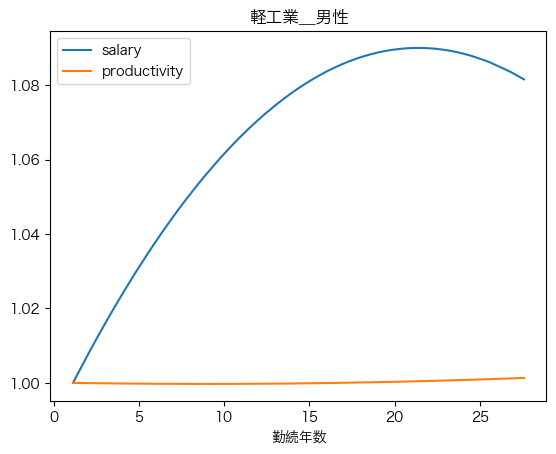

In [52]:
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(x_hats,sal_lis,label = 'salary')
plt.plot(x_hats,pro_lis,label = 'productivity') #y(n)/y(0)
plt.title('軽工業＿男性')
plt.xlabel('勤続年数')
plt.legend()

fig.savefig('軽工業＿男性.png')

In [53]:
hiseiki_male = male_data['hiseiki']
s_p = salary_hats - pro_hats


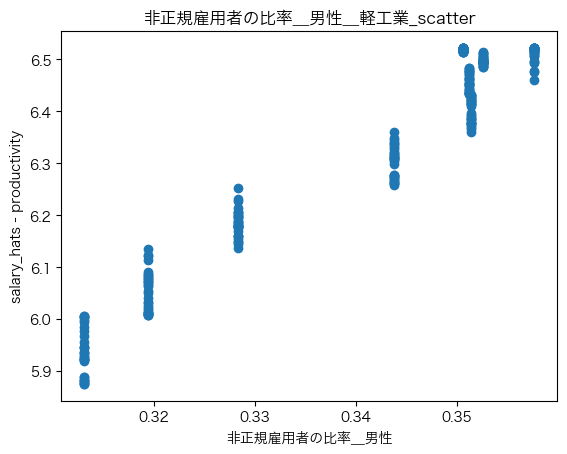

In [54]:
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(hiseiki_male,s_p)
plt.xlabel('非正規雇用者の比率＿男性')
plt.ylabel('salary_hats - productivity')
plt.title('非正規雇用者の比率＿男性＿軽工業_scatter')

plt.savefig('非正規雇用者の比率＿男性＿軽工業_scatter')

# graph(female)

In [55]:
kinzoku_p_f = female_pro_res.params[1]
kinzoku_square_p_f = female_pro_res.params[2]
const_p_f = female_pro_res.params[0]


In [56]:
kinzoku_s_f = female_salary_res.params[1]
kinzoku_square_s_f = female_salary_res.params[2]
const_s_f = female_salary_res.params[0]

In [57]:
f_salary_f =lambda x: kinzoku_s_f * x + kinzoku_square_s_f * (x**2) + const_s_f
f_pro_f = lambda x : kinzoku_p_f * x + kinzoku_square_p_f * (x**2) + const_p_f


In [58]:
x_hats_f = female_data['勤続年数']
x_hats_f = np.sort(x_hats_f)

In [59]:
salary_hats_f = f_salary_f(np.array(x_hats_f))
pro_hats_f = f_pro_f(np.array(x_hats_f))

In [60]:
pro_lis_f = []
for ind in range(len(pro_hats_f)):
    res = pro_hats_f[ind]/pro_hats_f[0]
    pro_lis_f.append(res)


In [61]:
sal_lis_f = []
for ind in range(len(salary_hats_f)):
    res = salary_hats_f[ind]/salary_hats_f[0]
    sal_lis_f.append(res)

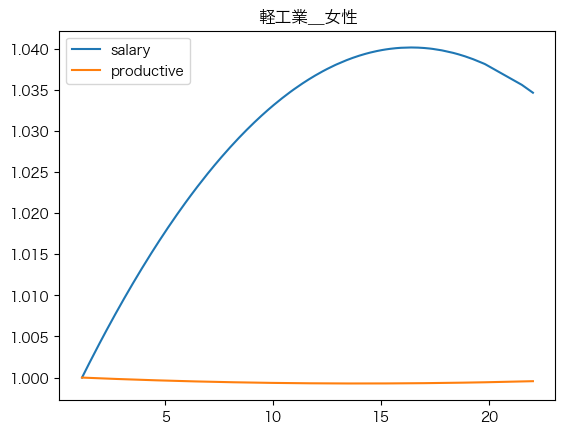

In [62]:
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(x_hats_f,sal_lis_f,label = 'salary')
plt.plot(x_hats_f,pro_lis_f,label = 'productive') #y(n)/y(0)
plt.legend()
plt.title('軽工業＿女性')

fig.savefig('軽工業＿女性')

In [63]:
hiseiki_female = female_data['hiseiki']
s_p_f = salary_hats_f - pro_hats_f

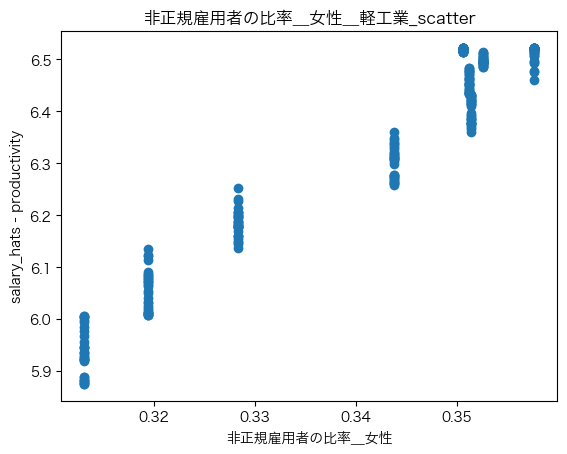

In [64]:
fig = plt.figure()
ax = plt.subplot(111)


plt.scatter(hiseiki_female,s_p)
plt.xlabel('非正規雇用者の比率＿女性')
plt.ylabel('salary_hats - productivity')
plt.title('非正規雇用者の比率＿女性＿軽工業_scatter')

plt.savefig('非正規雇用者の比率＿女性_軽工業_scatter')

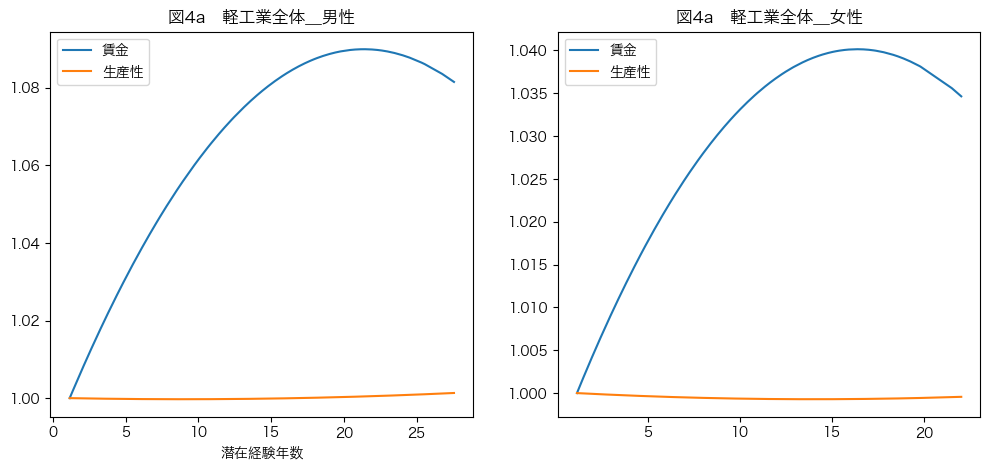

In [65]:
fig = plt.figure(figsize=(12,5))


ax1 = plt.subplot(121)
plt.plot(x_hats,sal_lis,label = '賃金')
plt.plot(x_hats,pro_lis,label = '生産性') #y(n)/y(0)
plt.title('軽工業＿男性')
plt.xlabel('潜在経験年数')
plt.legend()


plt.title('図4a　軽工業全体＿男性')


ax2 = plt.subplot(122)
plt.plot(x_hats_f,sal_lis_f,label = '賃金')
plt.plot(x_hats_f,pro_lis_f,label = '生産性') #y(n)/y(0)
plt.legend()
plt.title('図4a　軽工業全体＿女性')

plt.savefig('軽工業.png')

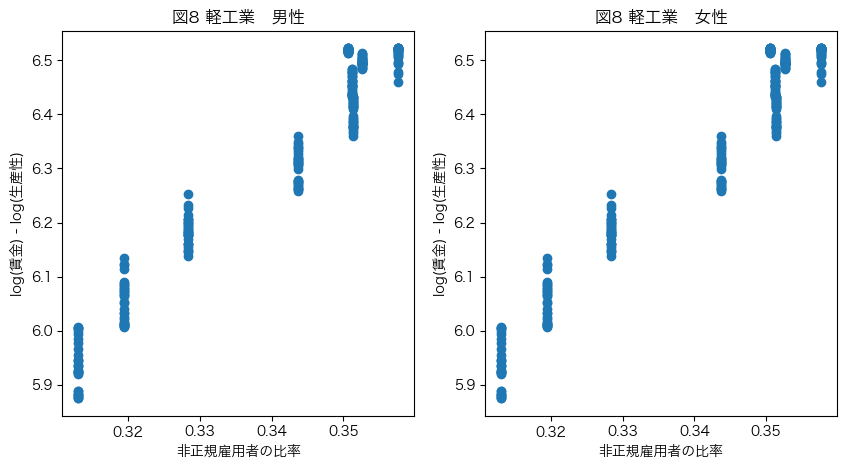

In [66]:
figure = plt.figure(figsize = (10,5))
ax1 = plt.subplot(121)
plt.scatter(hiseiki_male,s_p)
plt.xlabel('非正規雇用者の比率')
plt.ylabel('log(賃金) - log(生産性)')
plt.title('図8 軽工業　男性')

ax2= plt.subplot(122)
plt.scatter(hiseiki_female,s_p)
plt.xlabel('非正規雇用者の比率')
plt.ylabel('log(賃金) - log(生産性)')
plt.title('図8 軽工業　女性')

plt.savefig('図8')